In [2]:
library(janitor)
library(tidyverse)
library(ggplot2)


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
data <- read.csv("/Users/hoaho/Study/HCMUS/R/statistical-data-processing-project/data/diabetes_012_health_indicators_BRFSS2015.csv", na=c("", "NA", "N/A")) |> clean_names()
glimpse(data)

Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00C4>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00D6>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00DC>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00E4>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00F6>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00FC>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00DF>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00C6>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00E6>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00D8>' to native encoding"
Warning message in FUN(X[[i]], ...):
"unable to translate '<U+00F8>' to native encoding"
Warning message in FU

Rows: 253,680
Columns: 22
$ diabetes_012           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,~
$ high_bp                <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,~
$ high_chol              <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,~
$ chol_check             <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,~
$ smoker                 <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,~
$ stroke                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,~
$ heart_diseaseor_attack <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,~
$ phys_activity          <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,~
$ fruits                 <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,~
$ veggies                <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,~
$ hvy_alcohol_consump    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ any_healthca

#### 1. diabetes_012 vs high_bp

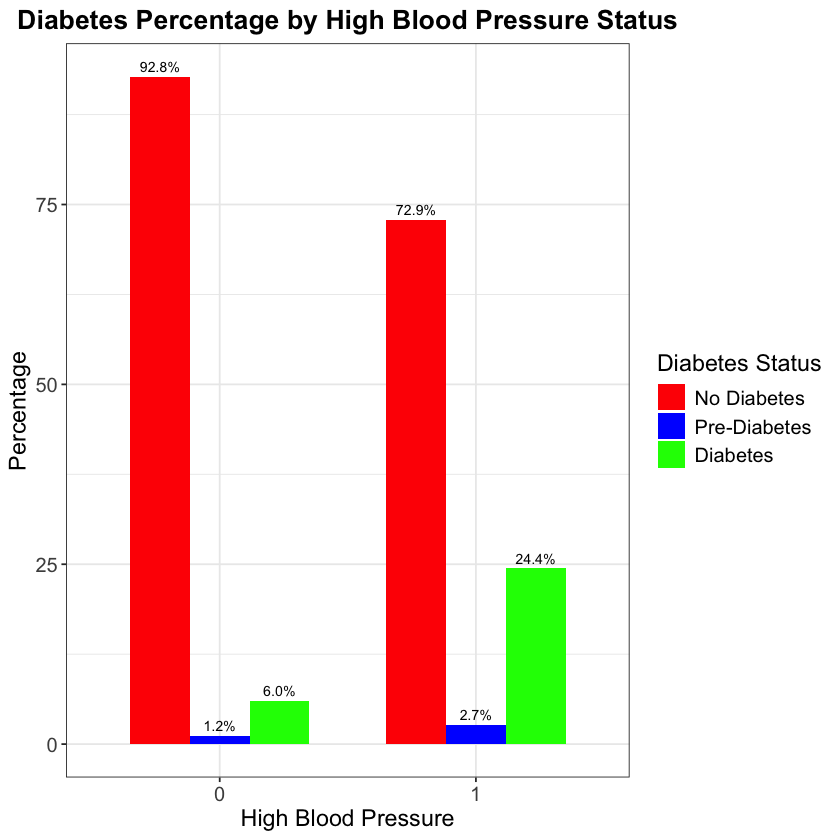

In [4]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$high_bp, data$diabetes_012))
colnames(freq_data) <- c("high_bp", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm high_bp
total_by_group <- aggregate(frequency ~ high_bp, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "high_bp")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$high_bp <- as.factor(freq_data$high_bp)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = high_bp, y = percentage, fill = diabetes_012)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  geom_text(aes(label = sprintf("%.1f%%", percentage)), 
            position = position_dodge(width = 0.7), 
            vjust = -0.5, 
            size = 3) +
  labs(
    title = "Diabetes Percentage by High Blood Pressure Status",
    x = "High Blood Pressure",
    y = "Percentage",
    fill = "Diabetes Status"
  ) +
  scale_fill_manual(
    values = c("red", "blue", "green"),
    labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

Biểu đồ cho thấy mối liên hệ giữa huyết áp cao và tình trạng tiểu đường:
- **Không bị huyết áp cao (0):**
    - 92.8% không bị tiểu đường.
    -  6.0% bị tiểu đường.
    - 1.2% tiền tiểu đường.
- **Bị huyết áp cao (1):**
    - 72.9% không bị tiểu đường
    - 24.4% bị tiểu đường.
    - 2.7% tiền tiểu đường.

**Nhận xét**:
- Huyết áp cao liên quan đến nguy cơ tiểu đường cao hơn.
- Tỷ lệ người không bị tiểu đường giảm khi có huyết áp cao.

#### 2. diabetes_012 vs high_chol

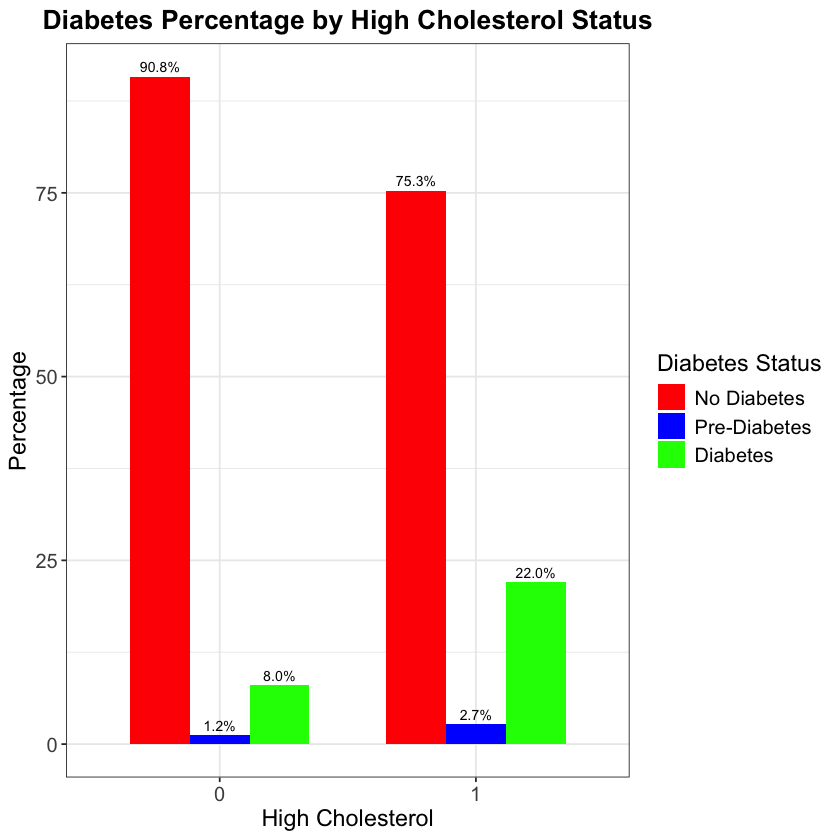

In [5]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$high_chol, data$diabetes_012))
colnames(freq_data) <- c("high_chol", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm high_chol
total_by_group <- aggregate(frequency ~ high_chol, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "high_chol")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$high_chol <- as.factor(freq_data$high_chol)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = high_chol, y = percentage, fill = diabetes_012)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  geom_text(aes(label = sprintf("%.1f%%", percentage)), 
            position = position_dodge(width = 0.7), 
            vjust = -0.5, 
            size = 3) +
  labs(
    title = "Diabetes Percentage by High Cholesterol Status",
    x = "High Cholesterol",
    y = "Percentage",
    fill = "Diabetes Status"
  ) +
  scale_fill_manual(
    values = c("red", "blue", "green"),
    labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

Biểu đồ cho thấy mối quan hệ giữa tình trạng cholesterol cao và tiểu đường:
- **Không bị cholesterol cao (0):**
    - 90.8% không bị tiểu đường.
    - 8.0% bị tiểu đường.
    - 1.2% tiền tiểu đường.

- **Bị cholesterol cao (1):**
    - 75.3% không bị tiểu đường.
    - 22.0% bị tiểu đường.
    - 2.7% tiền tiểu đường.

**Nhận xét**:
- Người có cholesterol cao có tỷ lệ bị tiểu đường (22.0%) cao hơn so với người không bị cholesterol cao (8.0%).
- Tỷ lệ không bị tiểu đường giảm đáng kể khi cholesterol cao.

#### 3. diabetes_012 vs chol_check

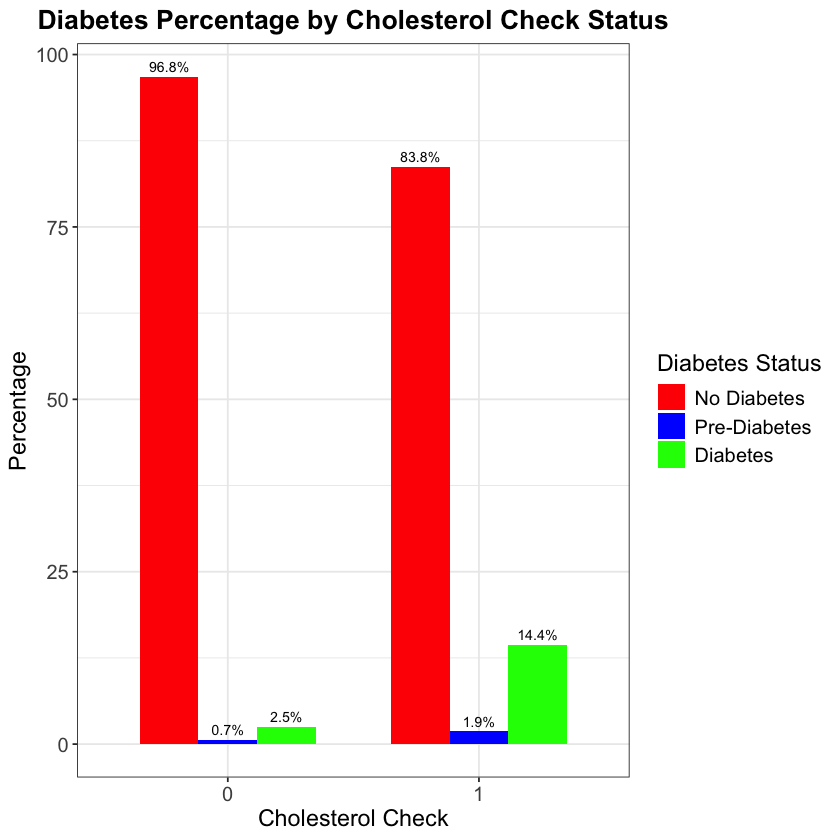

In [6]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$chol_check, data$diabetes_012))
colnames(freq_data) <- c("chol_check", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm chol_check
total_by_group <- aggregate(frequency ~ chol_check, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "chol_check")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$chol_check <- as.factor(freq_data$chol_check)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = chol_check, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Cholesterol Check Status",
        x = "Cholesterol Check",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc kiểm tra cholesterol và tình trạng tiểu đường:
- **Không kiểm tra cholesterol (0):**
    - 96.8% không bị tiểu đường.
    - 2.5% bị tiểu đường.
    - 0.7% tiền tiểu đường.
- **Đã kiểm tra cholesterol (1):**
    - 83.8% không bị tiểu đường.
    - 14.4% bị tiểu đường.
    - 1.9% tiền tiểu đường.

**Nhận xét:**
- Những người đã kiểm tra cholesterol có tỷ lệ bị tiểu đường (14.4%) cao hơn so với những người chưa kiểm tra (2.5%).
- Tỷ lệ không bị tiểu đường giảm đáng kể ở nhóm đã kiểm tra cholesterol.

#### 4. diabetes_012 vs smoker

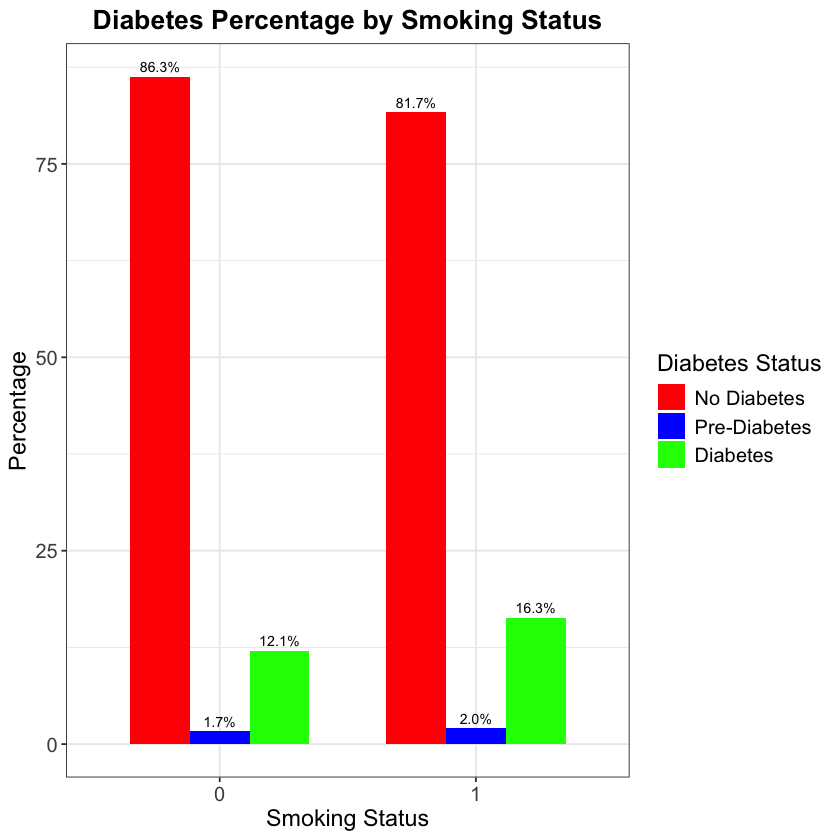

In [7]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$smoker, data$diabetes_012))
colnames(freq_data) <- c("smoker", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm smoker
total_by_group <- aggregate(frequency ~ smoker, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "smoker")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$smoker <- as.factor(freq_data$smoker)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = smoker, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Smoking Status",
        x = "Smoking Status",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa tình trạng hút thuốc và tình trạng tiểu đường:
- **Không hút thuốc (0):**
    - 86.3% không bị tiểu đường.
    - 12.1% bị tiểu đường.
    - 1.7% tiền tiểu đường.
- **Hút thuốc (1):**
    - 81.7% không bị tiểu đường.
    - 16.3% bị tiểu đường.
    - 2.0% tiền tiểu đường.

**Nhận xét:**
- Những người hút thuốc có tỷ lệ bị tiểu đường (16.3%) cao hơn so với những người không hút thuốc (12.1%).
- Tỷ lệ không bị tiểu đường giảm nhẹ ở nhóm hút thuốc.

#### 5. diabetes_012 vs stroke

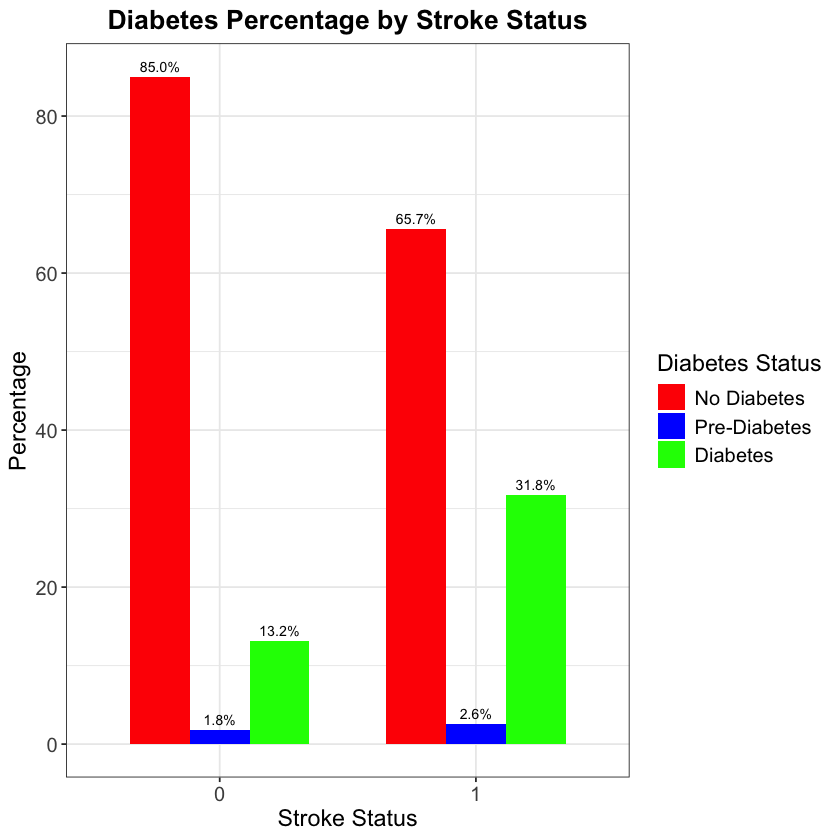

In [8]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$stroke, data$diabetes_012))
colnames(freq_data) <- c("stroke", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm stroke
total_by_group <- aggregate(frequency ~ stroke, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "stroke")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$stroke <- as.factor(freq_data$stroke)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = stroke, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Stroke Status",
        x = "Stroke Status",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa tình trạng đột quỵ và tình trạng tiểu đường:
- **Không bị đột quỵ (0):**
    - 85.0% không bị tiểu đường.
    - 13.2% bị tiểu đường.
    - 1.8% tiền tiểu đường.
- **Bị đột quỵ (1):**
    - 65.7% không bị tiểu đường.
    - 31.8% bị tiểu đường.
    - 2.6% tiền tiểu đường.

**Nhận xét:**
- Những người bị đột quỵ có tỷ lệ bị tiểu đường (31.8%) cao hơn nhiều so với những người không bị đột quỵ (13.2%).
- Tỷ lệ không bị tiểu đường giảm đáng kể ở nhóm bị đột quỵ.

#### 6. diabetes_012 vs heart_diseaseor_attack

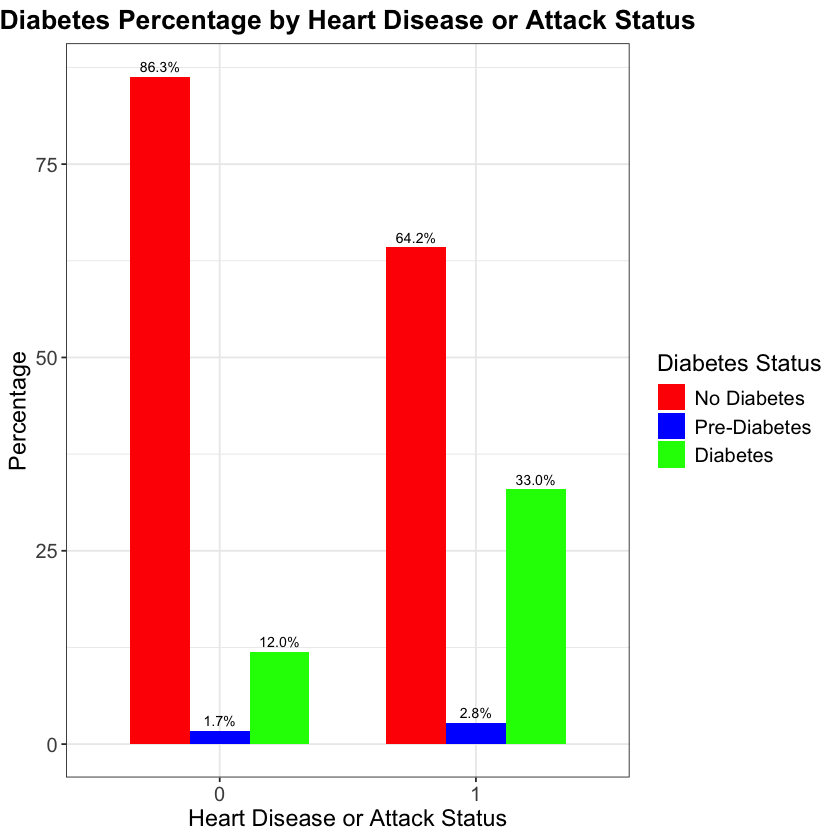

In [9]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$heart_diseaseor_attack, data$diabetes_012))
colnames(freq_data) <- c("heart_diseaseor_attack", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm heart_diseaseor_attack
total_by_group <- aggregate(frequency ~ heart_diseaseor_attack, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "heart_diseaseor_attack")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$heart_diseaseor_attack <- as.factor(freq_data$heart_diseaseor_attack)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = heart_diseaseor_attack, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Heart Disease or Attack Status",
        x = "Heart Disease or Attack Status",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa bệnh tim hoặc cơn đau tim và tình trạng tiểu đường:
- **Không mắc bệnh tim (0):**
    - 86.3% không bị tiểu đường.
    - 12.0% bị tiểu đường.
    - 1.7% tiền tiểu đường.
- **Mắc bệnh tim (1):**
    - 64.2% không bị tiểu đường.
    - 33.0% bị tiểu đường.
    - 2.8% tiền tiểu đường.

**Nhận xét:**
- Những người mắc bệnh tim có tỷ lệ bị tiểu đường (33.0%) cao hơn nhiều so với những người không mắc bệnh tim (12.0%).
- Tỷ lệ không bị tiểu đường giảm rõ rệt ở nhóm mắc bệnh tim.

#### 7. diabetes_012 vs phys_activity

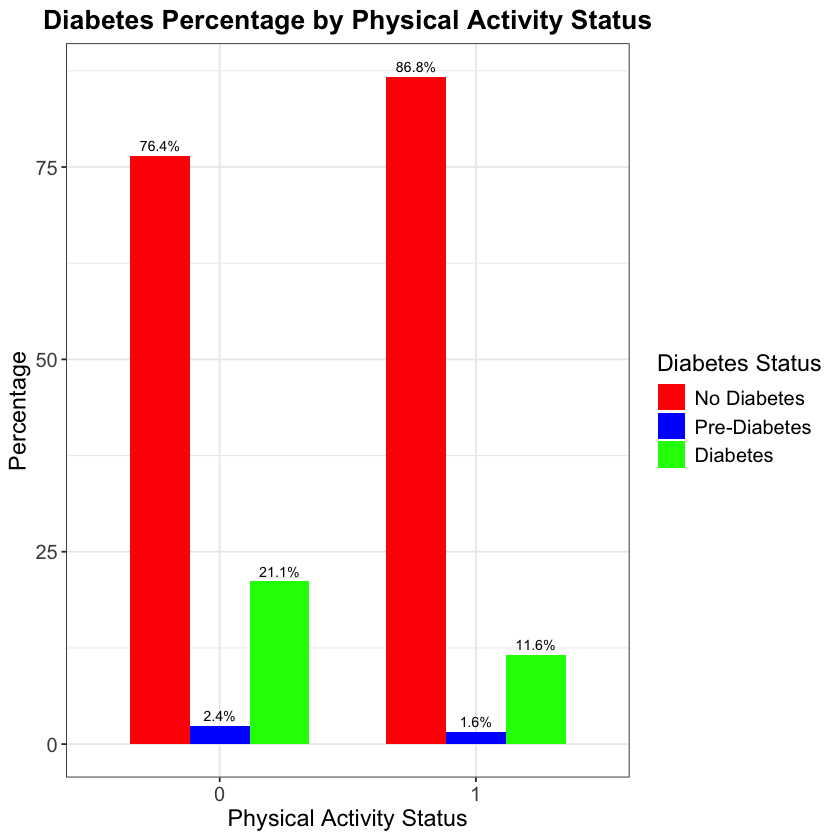

In [10]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$phys_activity, data$diabetes_012))
colnames(freq_data) <- c("phys_activity", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm phys_activity
total_by_group <- aggregate(frequency ~ phys_activity, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "phys_activity")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$phys_activity <- as.factor(freq_data$phys_activity)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = phys_activity, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Physical Activity Status",
        x = "Physical Activity Status",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa hoạt động thể chất và tình trạng tiểu đường:
- **Không hoạt động thể chất (0):**
    - 76.4% không bị tiểu đường.
    - 21.1% bị tiểu đường.
    - 2.4% tiền tiểu đường.
- **Có hoạt động thể chất (1):**
    - 86.8% không bị tiểu đường.
    - 11.6% bị tiểu đường.
    - 1.6% tiền tiểu đường.

**Nhận xét:**
- Những người có hoạt động thể chất có tỷ lệ bị tiểu đường thấp hơn (11.6%) so với những người không hoạt động thể chất (21.1%).
- Tỷ lệ không bị tiểu đường cao hơn đáng kể ở nhóm có hoạt động thể chất.

#### 8. diabetes_012 vs fruits

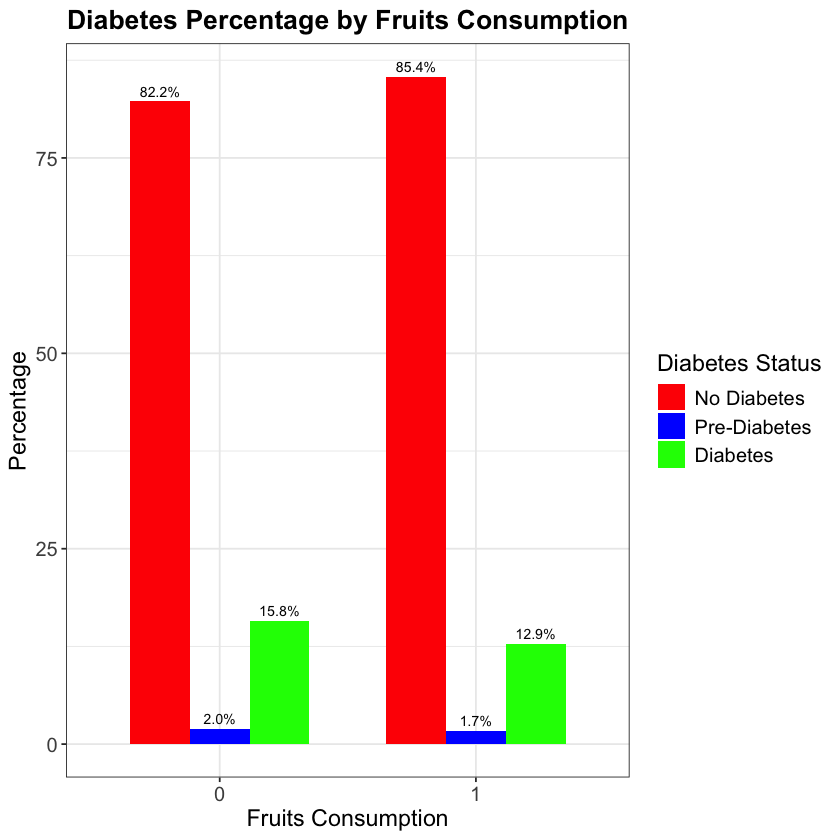

In [11]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$fruits, data$diabetes_012))
colnames(freq_data) <- c("fruits", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm fruits
total_by_group <- aggregate(frequency ~ fruits, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "fruits")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$fruits <- as.factor(freq_data$fruits)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = fruits, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Fruits Consumption",
        x = "Fruits Consumption",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc tiêu thụ trái cây và tình trạng tiểu đường:
- **Không tiêu thụ trái cây (0):**
    - 82.2% không bị tiểu đường.
    - 15.8% bị tiểu đường.
    - 2.0% tiền tiểu đường.
- **Có tiêu thụ trái cây (1):**
    - 85.4% không bị tiểu đường.
    - 12.9% bị tiểu đường.
    - 1.7% tiền tiểu đường.

**Nhận xét:**
- Những người tiêu thụ trái cây có tỷ lệ bị tiểu đường thấp hơn (12.9%) so với những người không tiêu thụ trái cây (15.8%).
- Tỷ lệ không bị tiểu đường cao hơn ở nhóm có tiêu thụ trái cây.

#### 9. diabetes_012 vs veggies

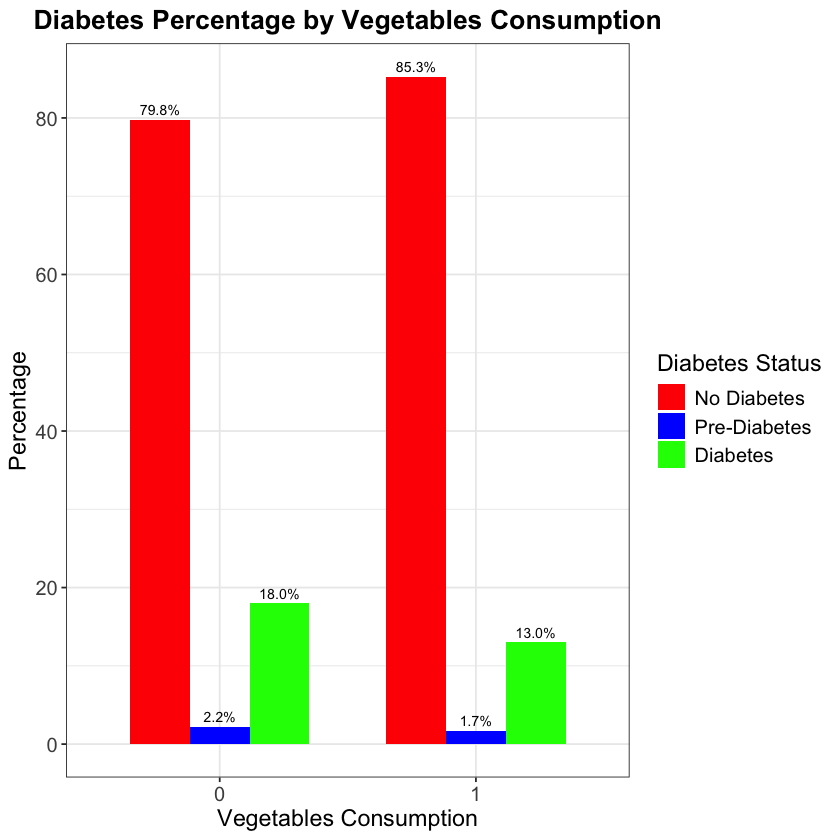

In [12]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$veggies, data$diabetes_012))
colnames(freq_data) <- c("veggies", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm veggies
total_by_group <- aggregate(frequency ~ veggies, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "veggies")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$veggies <- as.factor(freq_data$veggies)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = veggies, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Vegetables Consumption",
        x = "Vegetables Consumption",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc tiêu thụ rau và tình trạng tiểu đường:
- **Không tiêu thụ rau (0):**
    - 79.8% không bị tiểu đường.
    - 18.0% bị tiểu đường.
    - 2.2% tiền tiểu đường.
- **Có tiêu thụ rau (1):**
    - 85.3% không bị tiểu đường.
    - 13.0% bị tiểu đường.
    - 1.7% tiền tiểu đường.

**Nhận xét:**
- Những người tiêu thụ rau có tỷ lệ bị tiểu đường thấp hơn (13.0%) so với những người không tiêu thụ rau (18.0%).
- Tỷ lệ không bị tiểu đường cao hơn đáng kể ở nhóm có tiêu thụ rau.

#### 10. diabetes_012 vs hvy_alcohol_consump

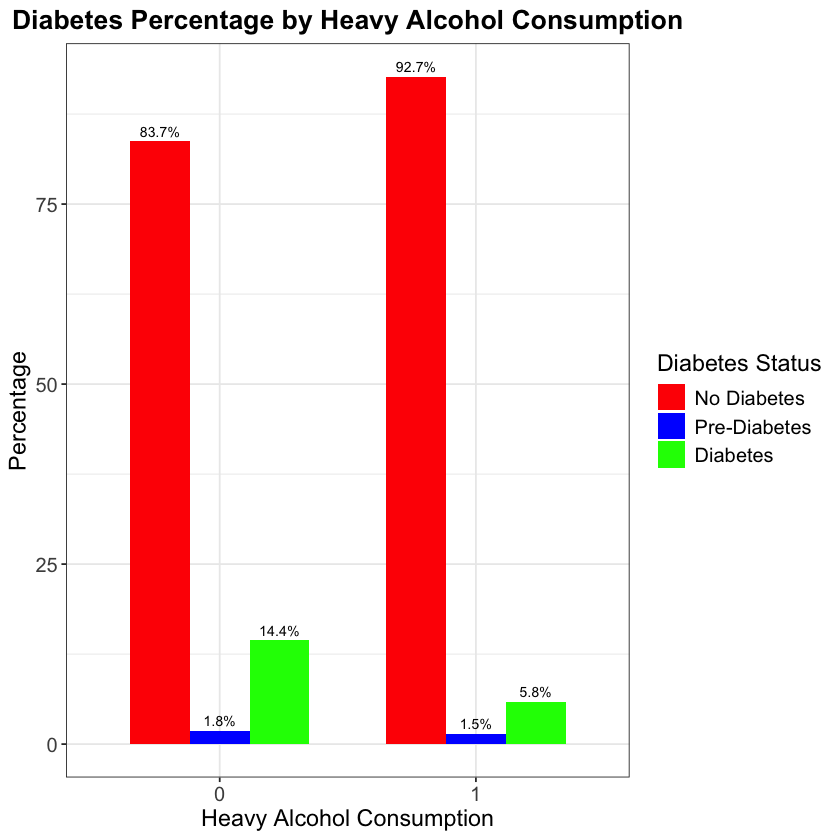

In [13]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$hvy_alcohol_consump, data$diabetes_012))
colnames(freq_data) <- c("hvy_alcohol_consump", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm hvy_alcohol_consump
total_by_group <- aggregate(frequency ~ hvy_alcohol_consump, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "hvy_alcohol_consump")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$hvy_alcohol_consump <- as.factor(freq_data$hvy_alcohol_consump)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = hvy_alcohol_consump, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Heavy Alcohol Consumption",
        x = "Heavy Alcohol Consumption",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc tiêu thụ rượu bia nhiều và tình trạng tiểu đường:
- **Không tiêu thụ rượu bia nhiều (0):**
    - 83.7% không bị tiểu đường.
    - 14.4% bị tiểu đường.
    - 1.8% tiền tiểu đường.
- **Tiêu thụ rượu bia nhiều (1):**
    - 92.7% không bị tiểu đường.
    - 5.8% bị tiểu đường.
    - 1.5% tiền tiểu đường.

**Nhận xét:**
- Những người tiêu thụ rượu bia nhiều có tỷ lệ bị tiểu đường thấp hơn (5.8%) so với những người không tiêu thụ rượu bia nhiều (14.4%).
- Tỷ lệ không bị tiểu đường cao hơn ở nhóm tiêu thụ rượu bia nhiều.

#### 11. diabetes_012 vs any_healthcare

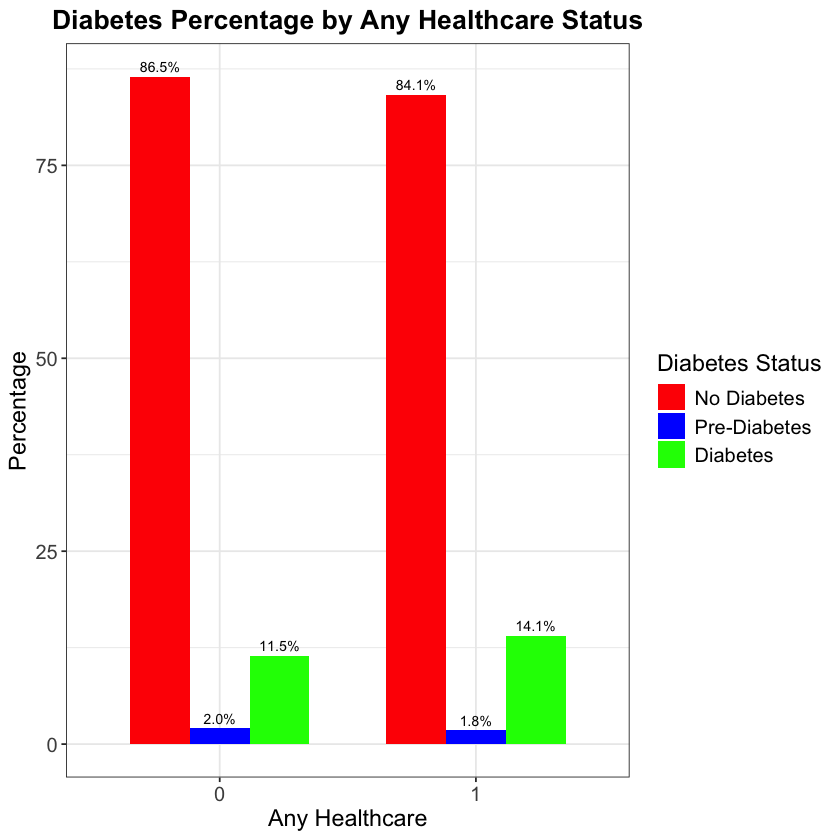

In [15]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$any_healthcare, data$diabetes_012))
colnames(freq_data) <- c("any_healthcare", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm any_healthcare
total_by_group <- aggregate(frequency ~ any_healthcare, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "any_healthcare")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$any_healthcare <- as.factor(freq_data$any_healthcare)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = any_healthcare, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Any Healthcare Status",
        x = "Any Healthcare",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc tiếp cận dịch vụ y tế và tình trạng tiểu đường:
- **Không tiếp cận dịch vụ y tế (0):**
    - 86.5% không bị tiểu đường.
    - 11.5% bị tiểu đường.
    - 2.0% tiền tiểu đường.
- **Có tiếp cận dịch vụ y tế (1):**
    - 84.1% không bị tiểu đường.
    - 14.1% bị tiểu đường.
    - 1.8% tiền tiểu đường.

**Nhận xét:**
- Những người có tiếp cận dịch vụ y tế có tỷ lệ bị tiểu đường cao hơn (14.1%) so với những người không tiếp cận dịch vụ y tế (11.5%).
- Tỷ lệ không bị tiểu đường giảm nhẹ ở nhóm có tiếp cận dịch vụ y tế.

#### 12. diabetes_012 vs no_docbc_cost 

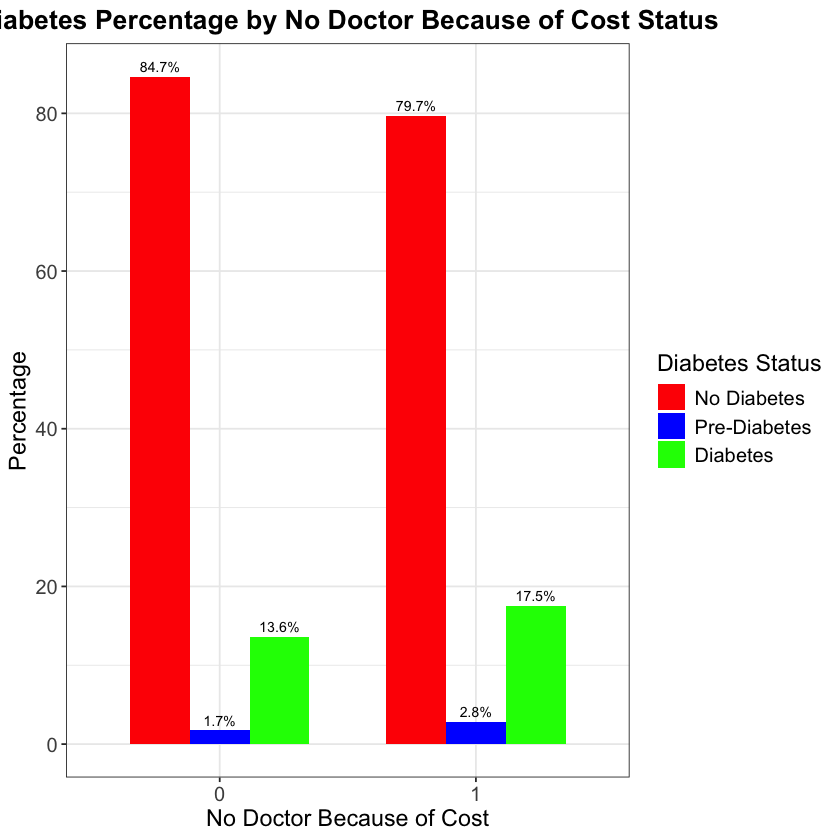

In [16]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$no_docbc_cost, data$diabetes_012))
colnames(freq_data) <- c("no_docbc_cost", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm no_docbc_cost
total_by_group <- aggregate(frequency ~ no_docbc_cost, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "no_docbc_cost")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$no_docbc_cost <- as.factor(freq_data$no_docbc_cost)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = no_docbc_cost, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by No Doctor Because of Cost Status",
        x = "No Doctor Because of Cost",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa việc không gặp bác sĩ vì chi phí và tình trạng tiểu đường:
- **Không gặp bác sĩ vì chi phí (0):**
    - 84.7% không bị tiểu đường.
    - 13.6% bị tiểu đường.
    - 1.7% tiền tiểu đường.
- **Có gặp bác sĩ vì chi phí (1):**
    - 79.7% không bị tiểu đường.
    - 17.5% bị tiểu đường.
    - 2.8% tiền tiểu đường.

**Nhận xét:**
- Những người gặp bác sĩ vì chi phí có tỷ lệ bị tiểu đường cao hơn (17.5%) so với những người không gặp bác sĩ vì chi phí (13.6%).
- Tỷ lệ không bị tiểu đường giảm đáng kể ở nhóm gặp bác sĩ vì chi phí.

#### 13. diabetes_012 vs gen_hlth 

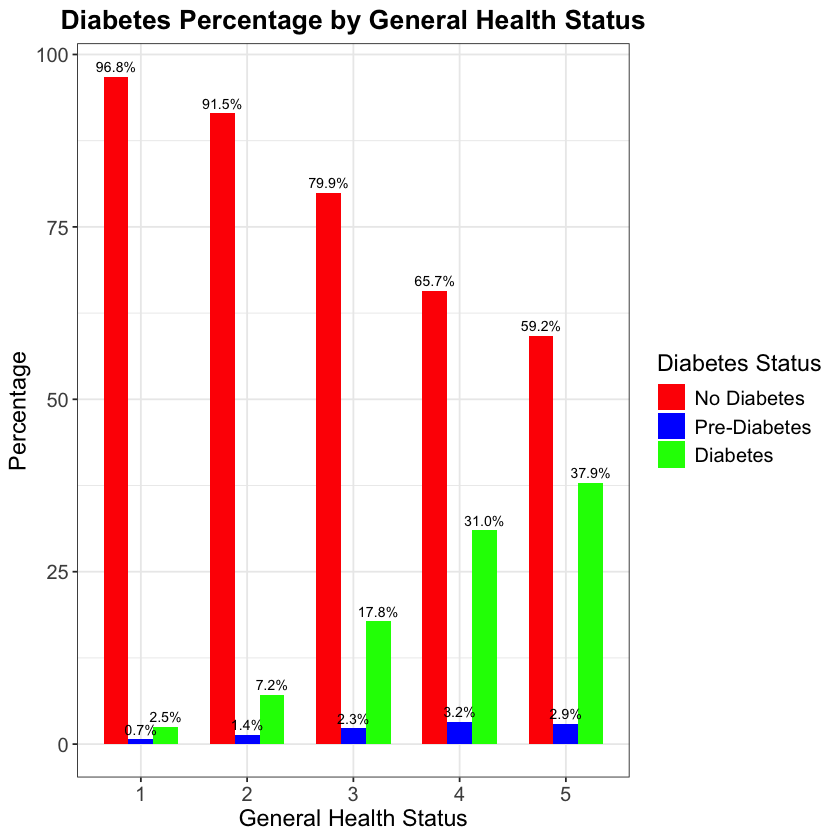

In [17]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$gen_hlth, data$diabetes_012))
colnames(freq_data) <- c("gen_hlth", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm gen_hlth
total_by_group <- aggregate(frequency ~ gen_hlth, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "gen_hlth")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$gen_hlth <- as.factor(freq_data$gen_hlth)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = gen_hlth, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by General Health Status",
        x = "General Health Status",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa tình trạng sức khỏe tổng quát và tình trạng tiểu đường:
- **Tình trạng sức khỏe 1 (Tốt nhất):**
    - 96.8% không bị tiểu đường.
    - 2.5% bị tiểu đường.
    - 0.7% tiền tiểu đường.
- **Tình trạng sức khỏe 2:**
    - 91.5% không bị tiểu đường.
    - 7.2% bị tiểu đường.
    - 1.4% tiền tiểu đường.
- **Tình trạng sức khỏe 3:**
    - 79.9% không bị tiểu đường.
    - 17.8% bị tiểu đường.
    - 2.3% tiền tiểu đường.
- **Tình trạng sức khỏe 4:**
    - 65.7% không bị tiểu đường.
    - 31.0% bị tiểu đường.
    - 3.2% tiền tiểu đường.
- **Tình trạng sức khỏe 5 (Tệ nhất):**
    - 59.2% không bị tiểu đường.
    - 37.9% bị tiểu đường.
    - 2.9% tiền tiểu đường.

**Nhận xét:**
- Tỷ lệ bị tiểu đường tăng dần khi tình trạng sức khỏe tổng quát xấu đi, từ 2.5% ở mức sức khỏe tốt nhất (1) lên 37.9% ở mức sức khỏe tệ nhất (5).
- Tỷ lệ không bị tiểu đường giảm mạnh khi tình trạng sức khỏe chuyển từ tốt nhất (96.8%) xuống tệ nhất (59.2%).

#### 14. diabetes_012 vs diff_walk

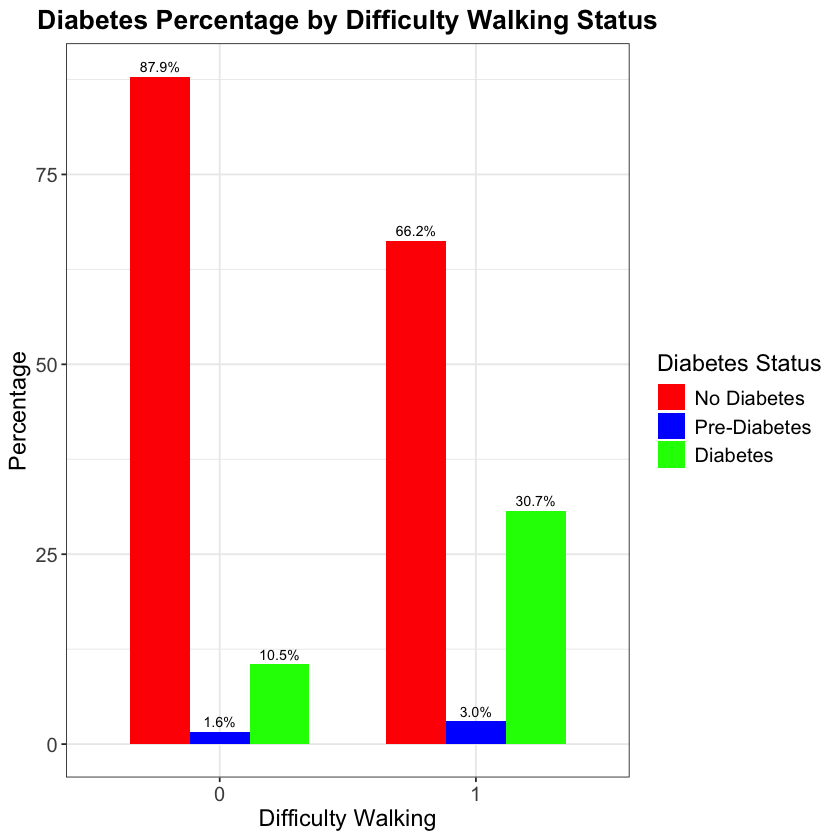

In [18]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$diff_walk, data$diabetes_012))
colnames(freq_data) <- c("diff_walk", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm diff_walk
total_by_group <- aggregate(frequency ~ diff_walk, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "diff_walk")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$diff_walk <- as.factor(freq_data$diff_walk)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = diff_walk, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Difficulty Walking Status",
        x = "Difficulty Walking",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa khó khăn trong việc đi lại và tình trạng tiểu đường:
- **Không gặp khó khăn khi đi lại (0):**
    - 87.9% không bị tiểu đường.
    - 10.5% bị tiểu đường.
    - 1.6% tiền tiểu đường.
- **Gặp khó khăn khi đi lại (1):**
    - 66.2% không bị tiểu đường.
    - 30.7% bị tiểu đường.
    - 3.0% tiền tiểu đường.

**Nhận xét:**
- Những người gặp khó khăn khi đi lại có tỷ lệ bị tiểu đường cao hơn đáng kể (30.7%) so với những người không gặp khó khăn (10.5%).
- Tỷ lệ không bị tiểu đường giảm mạnh từ 87.9% ở nhóm không gặp khó khăn xuống 66.2% ở nhóm gặp khó khăn.

#### 15. diabetes_012 vs sex

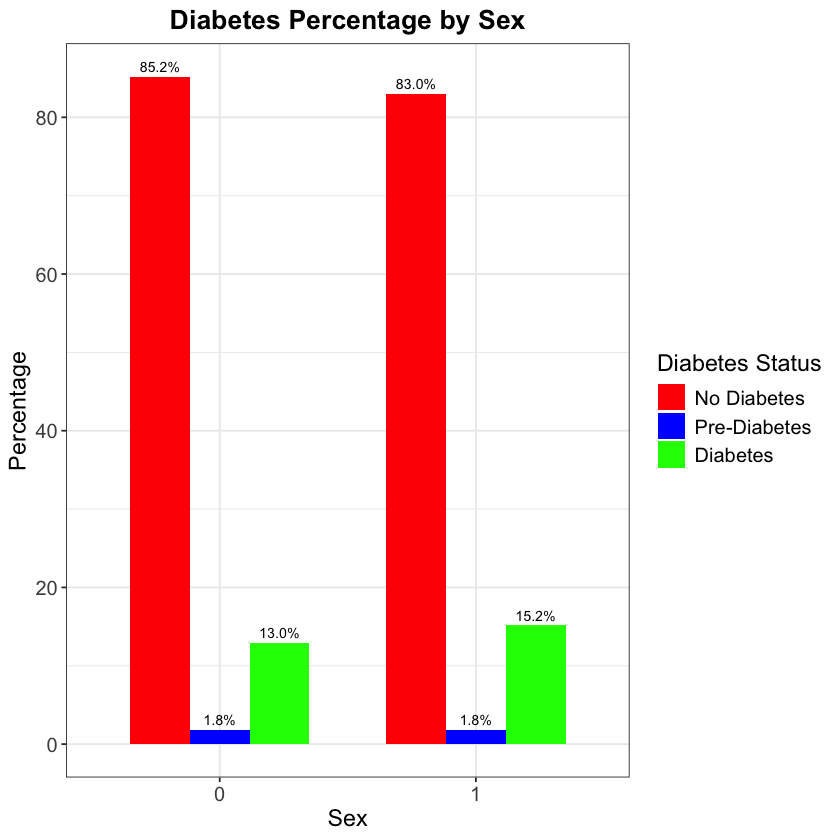

In [19]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$sex, data$diabetes_012))
colnames(freq_data) <- c("sex", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm sex
total_by_group <- aggregate(frequency ~ sex, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "sex")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$sex <- as.factor(freq_data$sex)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = sex, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Sex",
        x = "Sex",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa giới tính và tình trạng tiểu đường:
- **Nữ (0):**
    - 85.2% không bị tiểu đường.
    - 13.0% bị tiểu đường.
    - 1.8% tiền tiểu đường.
- **Nam (1):**
    - 83.0% không bị tiểu đường.
    - 15.2% bị tiểu đường.
    - 1.8% tiền tiểu đường.

**Nhận xét:**
- Nam giới có tỷ lệ bị tiểu đường cao hơn (15.2%) so với nữ giới (13.0%).
- Tỷ lệ không bị tiểu đường ở nam giới thấp hơn một chút (83.0%) so với nữ giới (85.2%).

#### 16. diabetes_012 vs age

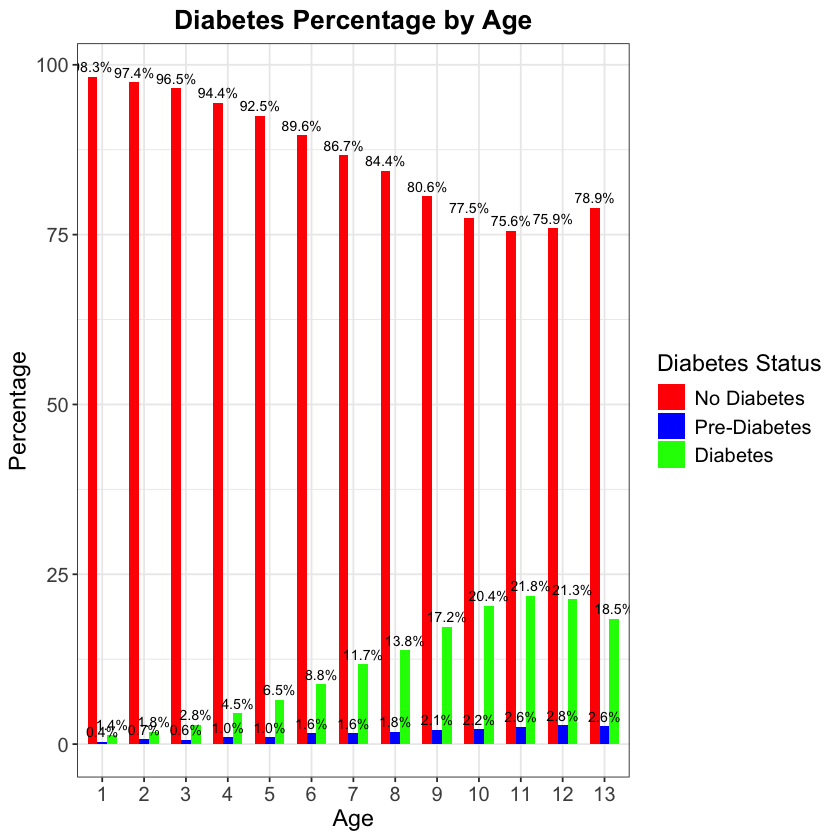

In [21]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$age, data$diabetes_012))
colnames(freq_data) <- c("age", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm age
total_by_group <- aggregate(frequency ~ age, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "age")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$age <- as.factor(freq_data$age)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = age, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Age",
        x = "Age",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa nhóm tuổi và tình trạng tiểu đường:
- **Nhóm tuổi từ 1 đến 6:**
    - Tỷ lệ không bị tiểu đường giảm từ 98.3% (nhóm tuổi 1) xuống 89.6% (nhóm tuổi 6).
    - Tỷ lệ bị tiểu đường tăng nhẹ từ 0.4% (nhóm tuổi 1) lên 8.8% (nhóm tuổi 6).
    - Tỷ lệ tiền tiểu đường dao động từ 1.3% đến 1.6%.

- **Nhóm tuổi từ 7 đến 13:**
    - Tỷ lệ không bị tiểu đường tiếp tục giảm từ 86.7% (nhóm tuổi 7) xuống 75.9% (nhóm tuổi 13).
    - Tỷ lệ bị tiểu đường tăng đáng kể, từ 11.7% (nhóm tuổi 7) lên 21.3% (nhóm tuổi 11), sau đó giảm nhẹ xuống 18.5% (nhóm tuổi 13).
    - Tỷ lệ tiền tiểu đường dao động từ 1.8% đến 2.6%.

**Nhận xét:**
- Tỷ lệ không bị tiểu đường giảm dần khi tuổi tăng, đặc biệt rõ rệt sau nhóm tuổi 7.
- Tỷ lệ bị tiểu đường có xu hướng tăng theo tuổi, đạt đỉnh ở khoảng 21.8% (nhóm tuổi 11) trước khi giảm nhẹ.
- Tỷ lệ tiền tiểu đường duy trì ở mức thấp, không thay đổi nhiều theo độ tuổi.

#### 17. diabetes_012 vs education

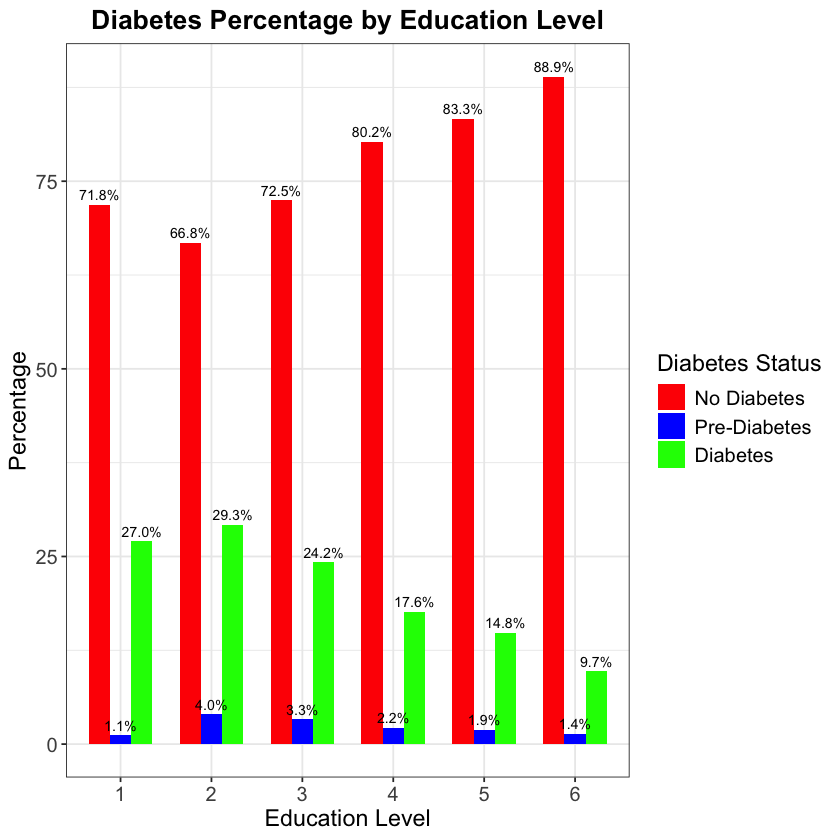

In [22]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$education, data$diabetes_012))
colnames(freq_data) <- c("education", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm education
total_by_group <- aggregate(frequency ~ education, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "education")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$education <- as.factor(freq_data$education)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = education, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Education Level",
        x = "Education Level",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa trình độ học vấn và tình trạng tiểu đường:
- **Trình độ học vấn 1 (thấp nhất):**
    - 71.8% không bị tiểu đường.
    - 27.0% bị tiểu đường.
    - 1.1% tiền tiểu đường.
- **Trình độ học vấn 2:**
    - 66.8% không bị tiểu đường.
    - 29.3% bị tiểu đường.
    - 4.0% tiền tiểu đường.
- **Trình độ học vấn 3:**
    - 72.5% không bị tiểu đường.
    - 24.2% bị tiểu đường.
    - 3.3% tiền tiểu đường.
- **Trình độ học vấn 4:**
    - 80.2% không bị tiểu đường.
    - 17.6% bị tiểu đường.
    - 2.2% tiền tiểu đường.
- **Trình độ học vấn 5:**
    - 83.3% không bị tiểu đường.
    - 14.8% bị tiểu đường.
    - 1.9% tiền tiểu đường.
- **Trình độ học vấn 6 (cao nhất):**
    - 88.9% không bị tiểu đường.
    - 9.7% bị tiểu đường.
    - 1.4% tiền tiểu đường.

**Nhận xét:**
- Tỷ lệ bị tiểu đường giảm dần khi trình độ học vấn tăng, từ 29.3% (trình độ 2) xuống còn 9.7% (trình độ 6).
- Tỷ lệ không bị tiểu đường tăng rõ rệt khi trình độ học vấn cao hơn, từ 66.8% (trình độ 2) lên 88.9% (trình độ 6).
- Tỷ lệ tiền tiểu đường dao động nhẹ, nhưng nhìn chung thấp ở mọi trình độ học vấn.

#### 18. diabetes_012 vs income

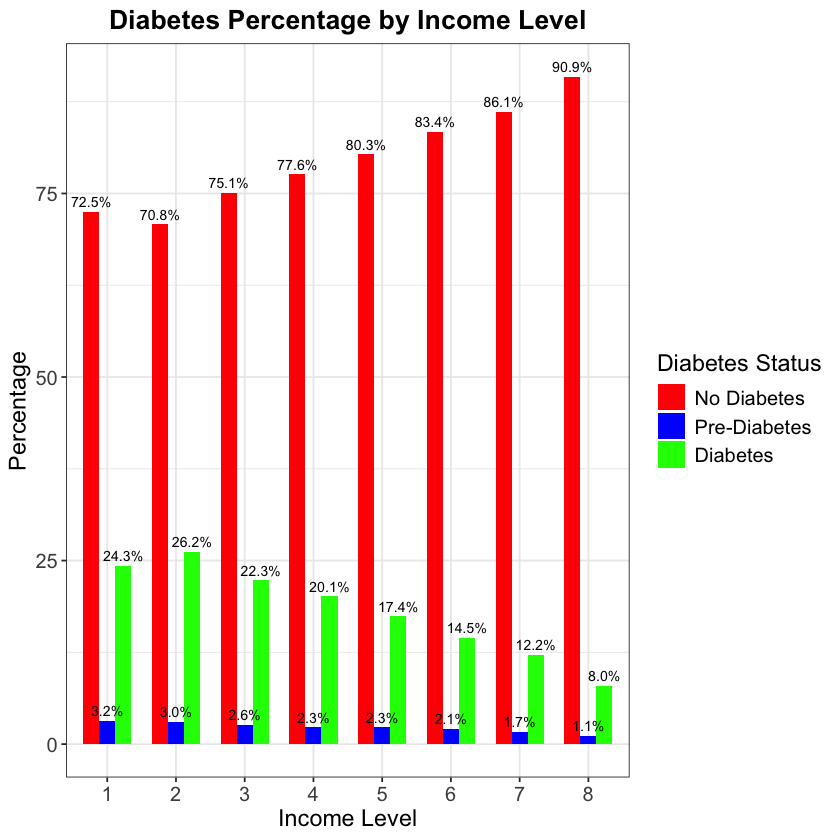

In [23]:
# Tạo tần suất của các nhóm
freq_data <- as.data.frame(table(data$income, data$diabetes_012))
colnames(freq_data) <- c("income", "diabetes_012", "frequency")

# Tính tổng số trong từng nhóm income
total_by_group <- aggregate(frequency ~ income, data = freq_data, sum)

# Tính tỷ lệ phần trăm
freq_data <- merge(freq_data, total_by_group, by = "income")
freq_data$percentage <- (freq_data$frequency.x / freq_data$frequency.y) * 100

# Chuyển đổi cột thành kiểu số
freq_data$income <- as.factor(freq_data$income)
freq_data$diabetes_012 <- as.factor(freq_data$diabetes_012)

# Vẽ biểu đồ
ggplot(freq_data, aes(x = income, y = percentage, fill = diabetes_012)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.7) +
    geom_text(aes(label = sprintf("%.1f%%", percentage)), 
                        position = position_dodge(width = 0.7), 
                        vjust = -0.5, 
                        size = 3) +
    labs(
        title = "Diabetes Percentage by Income Level",
        x = "Income Level",
        y = "Percentage",
        fill = "Diabetes Status"
    ) +
    scale_fill_manual(
        values = c("red", "blue", "green"),
        labels = c("No Diabetes", "Pre-Diabetes", "Diabetes")
    ) +
    theme_bw() +
    theme(
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        legend.text = element_text(size = 12)
    )

Biểu đồ cho thấy mối quan hệ giữa mức thu nhập và tình trạng tiểu đường:
- **Mức thu nhập 1 (thấp nhất):**
    - 72.5% không bị tiểu đường.
    - 24.3% bị tiểu đường.
    - 3.2% tiền tiểu đường.
- **Mức thu nhập 2:**
    - 70.8% không bị tiểu đường.
    - 26.2% bị tiểu đường.
    - 3.0% tiền tiểu đường.
- **Mức thu nhập 3:**
    - 75.1% không bị tiểu đường.
    - 22.3% bị tiểu đường.
    - 2.6% tiền tiểu đường.
- **Mức thu nhập 4:**
    - 77.6% không bị tiểu đường.
    - 20.1% bị tiểu đường.
    - 2.3% tiền tiểu đường.

- **Mức thu nhập 5:**
    - 80.3% không bị tiểu đường.
    - 17.4% bị tiểu đường.
    - 2.3% tiền tiểu đường.
- **Mức thu nhập 6:**
    - 83.4% không bị tiểu đường.
    - 14.5% bị tiểu đường.
    - 2.1% tiền tiểu đường.
- **Mức thu nhập 7:**
    - 86.1% không bị tiểu đường.
    - 12.2% bị tiểu đường.
    - 1.7% tiền tiểu đường.
- **Mức thu nhập 8 (cao nhất):**
    - 90.9% không bị tiểu đường.
    - 8.0% bị tiểu đường.
    - 1.1% tiền tiểu đường.

**Nhận xét:**
- Tỷ lệ bị tiểu đường giảm dần khi mức thu nhập tăng, từ 26.2% ở mức thu nhập 2 xuống 8.0% ở mức thu nhập 8.
- Tỷ lệ không bị tiểu đường tăng đáng kể theo mức thu nhập, từ 70.8% (mức 2) lên 90.9% (mức 8).
- Tỷ lệ tiền tiểu đường dao động nhẹ, nhưng giảm dần ở các mức thu nhập cao hơn.